<a href="https://colab.research.google.com/github/JYP0824/study/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/06_%EC%A3%BC%EC%84%B1%EB%B6%84_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

pca.components_.shape

(50, 10000)

In [8]:
def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, squeeze = False, figsize=(cols*ratio, rows*ratio))
  for i in range(rows):
    for j in range(cols):
      if i*10+j < n:
        axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

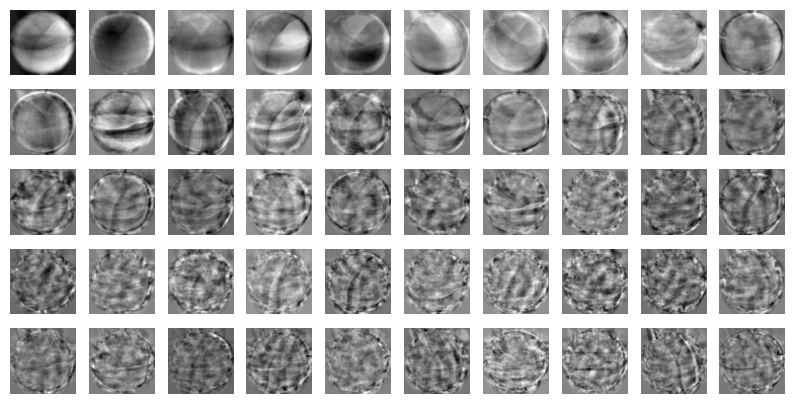

In [9]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [10]:
fruits_2d.shape

(300, 10000)

In [12]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

### 원본 데이터 재구성

In [14]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

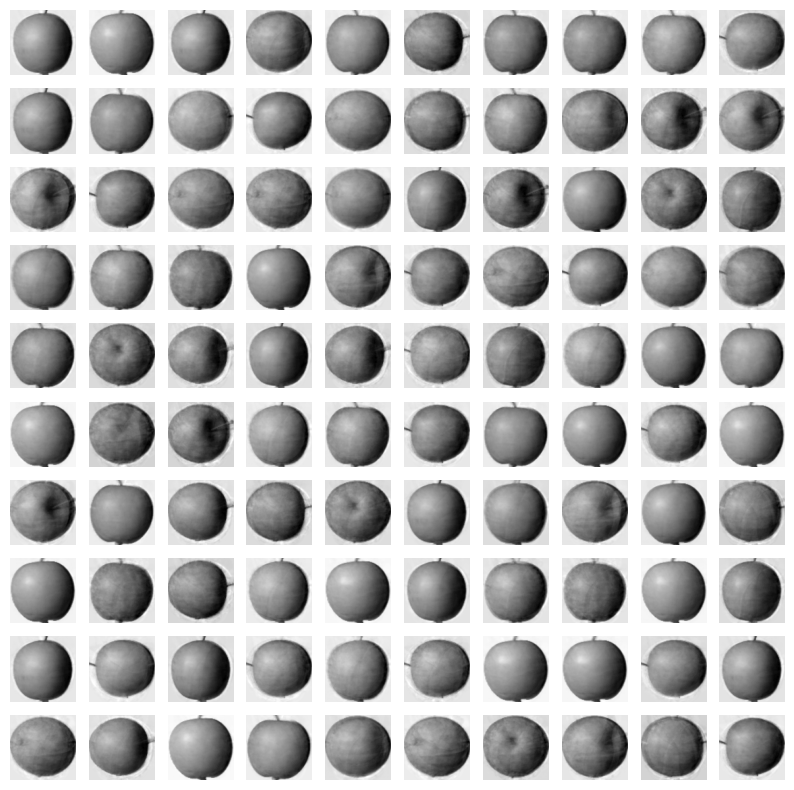

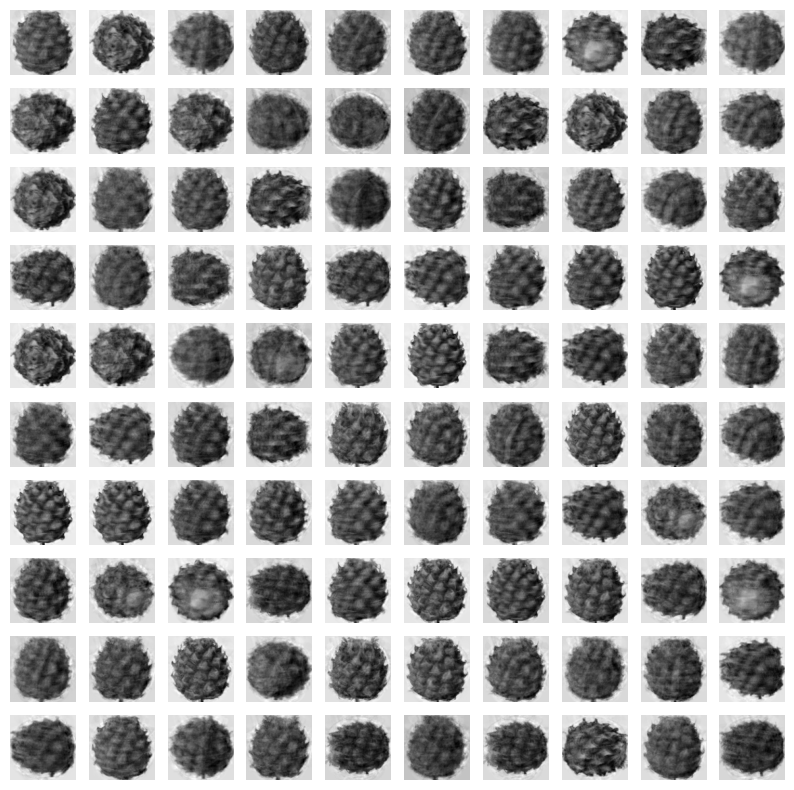

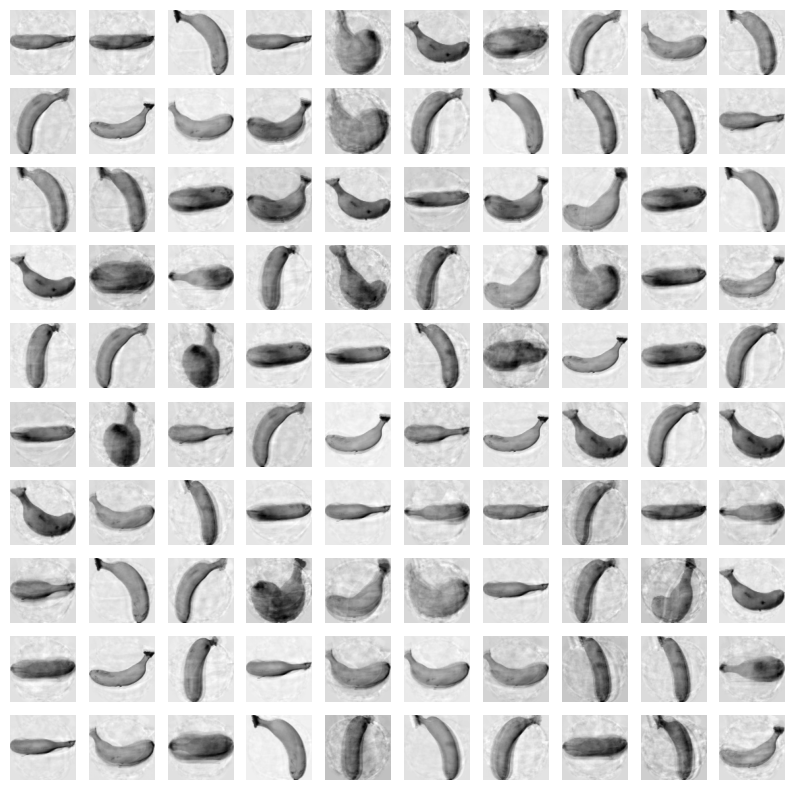

In [15]:
fruits_recon = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_recon[start:start+100])
  print('\n')

In [16]:
np.sum(pca.explained_variance_ratio_)

0.921468145182702

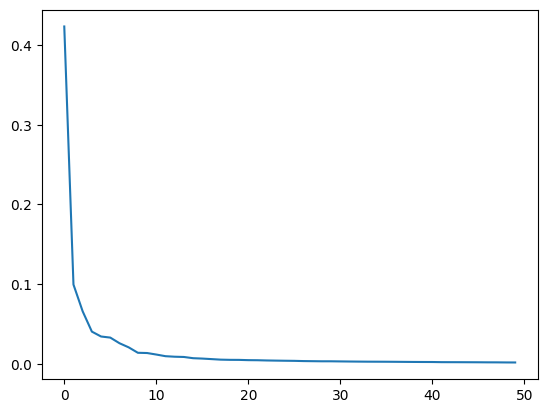

In [17]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
target = np.array([0]*100 + [1]*100 + [2]*100)

from sklearn.model_selection import cross_validate

score = cross_validate(lr, fruits_2d, target)
print(np.mean(score['test_score']))
np.mean(score['fit_time'])

0.9966666666666667


2.1768205165863037

In [28]:
score = cross_validate(lr, fruits_pca, target)
print(np.mean(score['test_score']))
np.mean(score['fit_time'])

1.0


0.04186339378356933

In [30]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
pca.n_components_

2

In [31]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [34]:
score = cross_validate(lr, fruits_pca, target)
print(np.mean(score['test_score']))
np.mean(score['fit_time'])

0.9933333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.0315514087677002

In [36]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
np.unique(km.labels_, return_counts=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

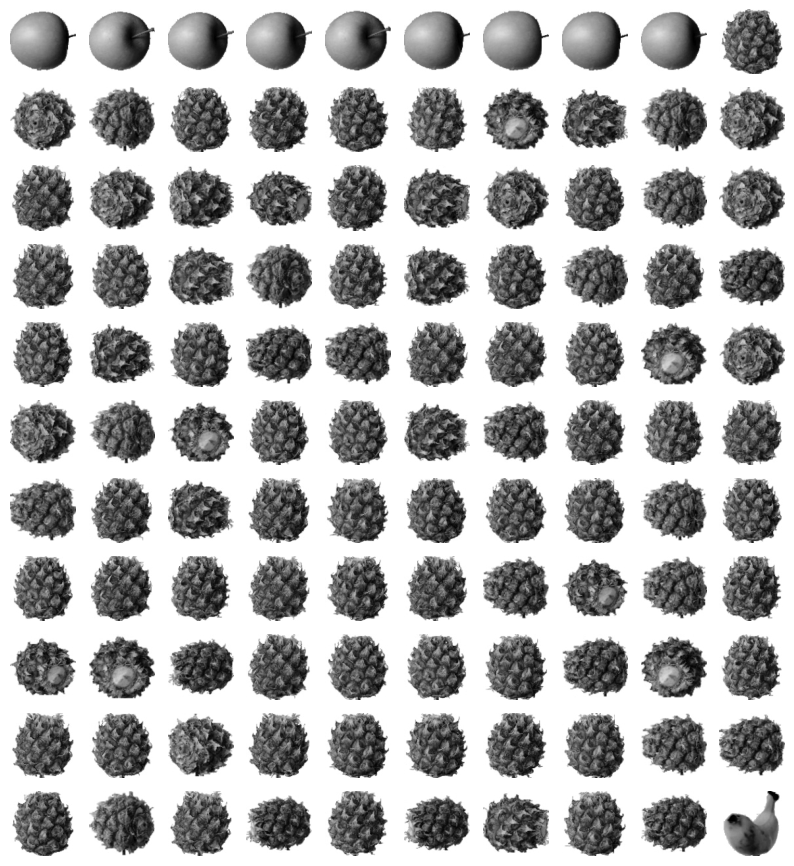

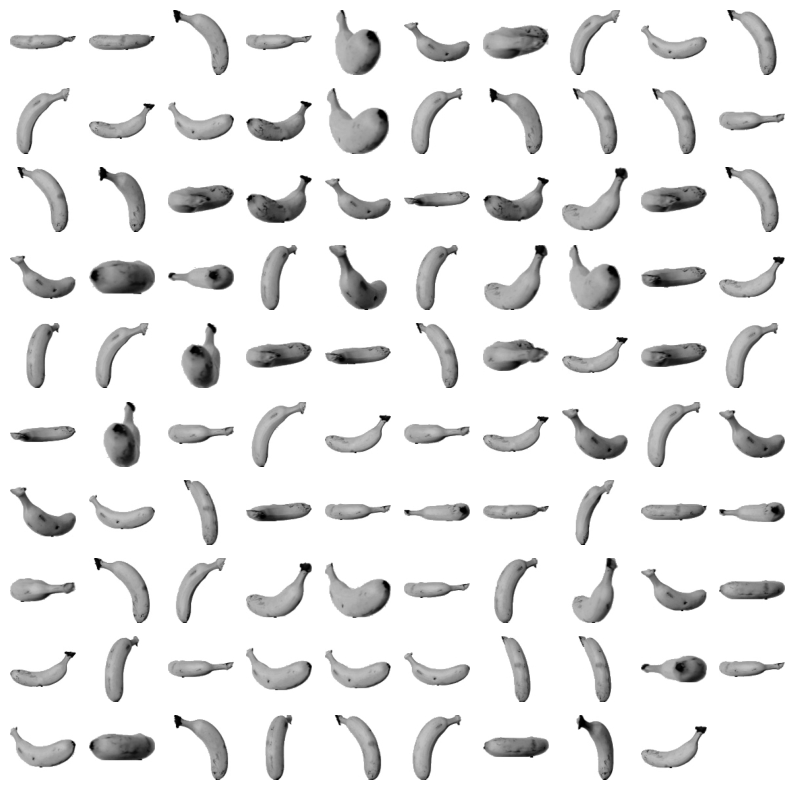

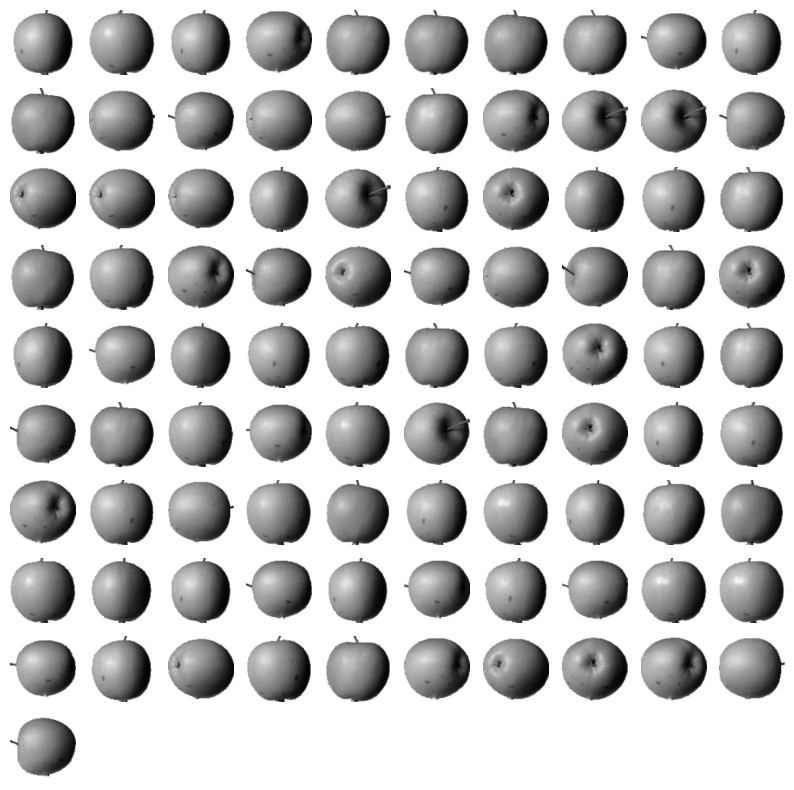

In [40]:
for label in  range(0,3):
  draw_fruits(fruits[km.labels_==label])
  print('\n')

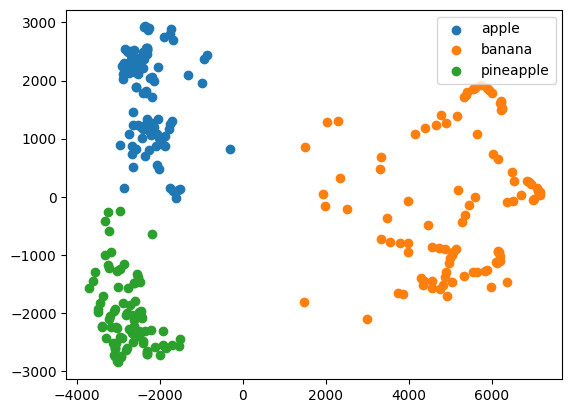

In [43]:
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()